In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/LoanApplications.csv')

In [2]:
df.head()

,Week,Applications
0,1,71
1,2,57
2,3,62
3,4,64
4,5,65


In [3]:
df.set_index('Week', inplace=True)

In [4]:
df.head()

,Applications
Week,
1,71
2,57
3,62
4,64
5,65


Populating the interactive namespace from numpy and matplotlib


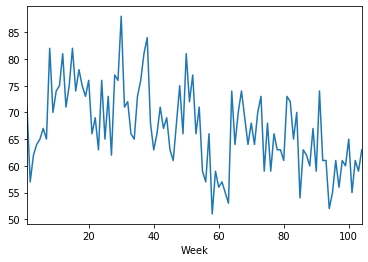

In [5]:
%pylab inline
df['Applications'].plot(kind = 'line')

In [6]:
import pandas as pd
import numpy as np
airline = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


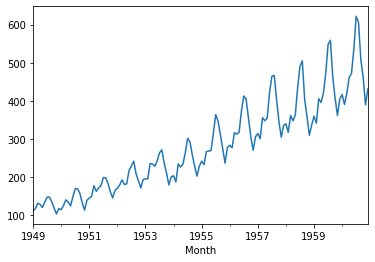

In [7]:
airline['Thousands of Passengers'].plot(kind = 'line')

In [8]:
moving_avg_6  =  airline['Thousands of Passengers'].rolling(window = 6).mean()

In [9]:
moving_avg_12 = airline['Thousands of Passengers'].rolling(12).mean()

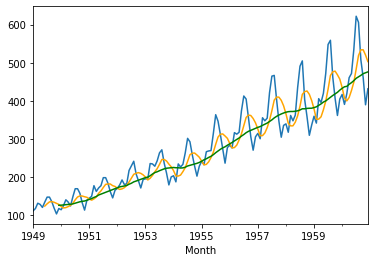

In [10]:
airline['Thousands of Passengers'].plot()
moving_avg_6.plot(color='orange')
moving_avg_12.plot(color='green')


## Seasonal Decomposition

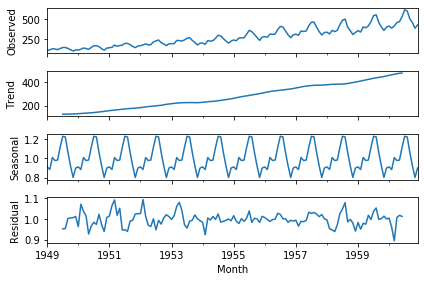

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result.plot();


In [16]:
import pandas
a = pandas.Series([1,2,3,4,5,6,7,8,9,10,11,12])
a.rolling(window = 6).mean()


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     3.5
6     4.5
7     5.5
8     6.5
9     7.5
10    8.5
11    9.5
dtype: float64

In [17]:
(1 + 2 + 3 +4 + 5 + 6) / 6

3.5

In [18]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()


In [20]:
?airline['Thousands of Passengers'].ewm

In [21]:
airline['EWMA12'].head()

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
Name: EWMA12, dtype: float64

In [22]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()


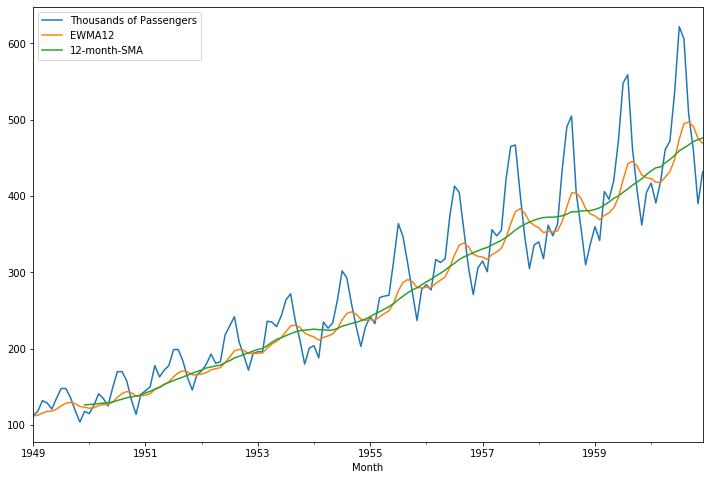

In [23]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)


### Holt-Winters 方法

In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df.index
df.index.freq = 'MS'
df.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [25]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()


,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


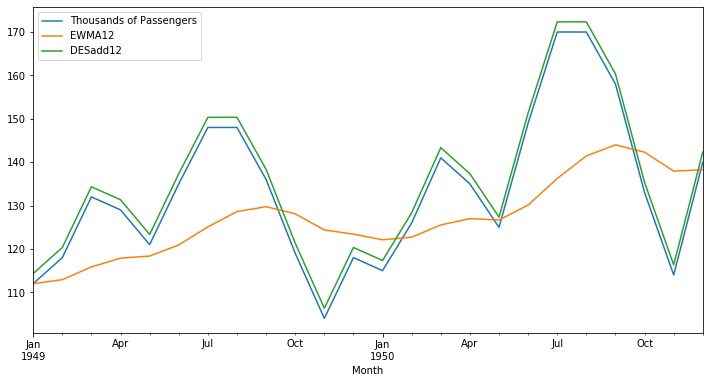

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)



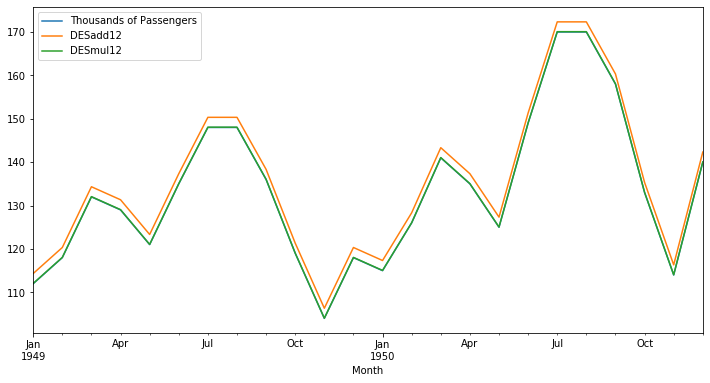

In [28]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


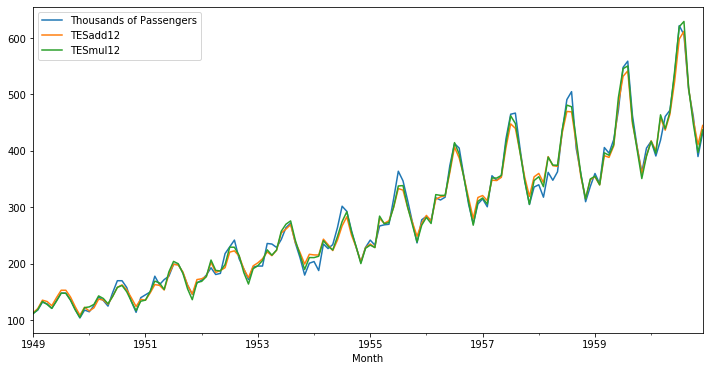

In [29]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


- weather, people
- weather(t-1), people(t-1) => people(t)
- weather(t-1),weather(t-2), people(t-1),people(t-2) => people(t)

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [31]:
len(df)

144

In [34]:
len(df) * 0.75

108.0

In [35]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]


In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(
    train_data['Thousands of Passengers'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12).fit()


In [37]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [39]:
train_data.tail()

,Thousands of Passengers
Month,
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336


In [40]:
test_data.head()

,Thousands of Passengers
Month,
1958-01-01,340
1958-02-01,318
1958-03-01,362
1958-04-01,348
1958-05-01,363


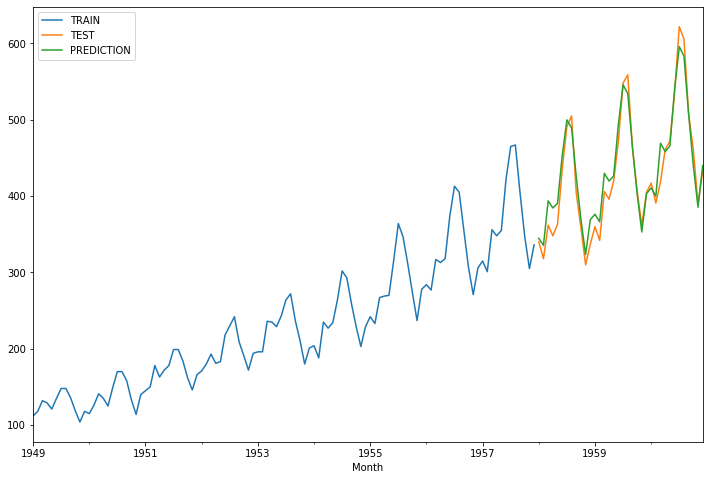

In [42]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));
test_predictions.plot(legend=True,label='PREDICTION');


In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test_data,test_predictions)

15.56316771169738

In [45]:
mean_squared_error(test_data,test_predictions)

376.02090269271736

In [46]:
np.sqrt(mean_squared_error(test_data,test_predictions))

19.391258409208962

## ARIMA

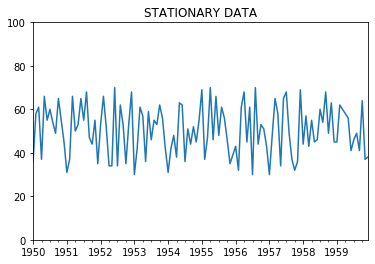

In [47]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/samples.csv',index_col=0,parse_dates=True) 
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

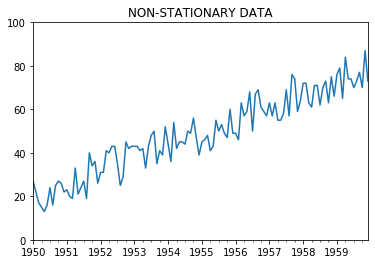

In [48]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

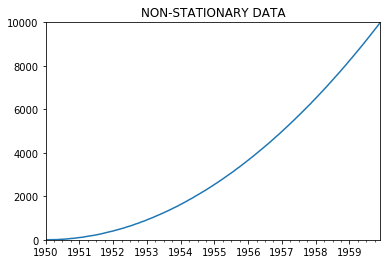

In [49]:
df2['c'].plot(ylim=[0,10000],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [53]:
df2['b'].head()

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
Name: b, dtype: int64

In [52]:
df2['b'].shift(1).head()

1950-01-01     NaN
1950-02-01    27.0
1950-03-01    22.0
1950-04-01    17.0
1950-05-01    15.0
Name: b, dtype: float64

In [54]:
df2['d1b'] = df2['b'] - df2['b'].shift(1)
df2['d1b'].head()

1950-01-01    NaN
1950-02-01   -5.0
1950-03-01   -5.0
1950-04-01   -2.0
1950-05-01   -2.0
Name: d1b, dtype: float64

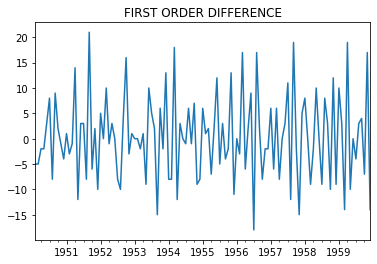

In [55]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

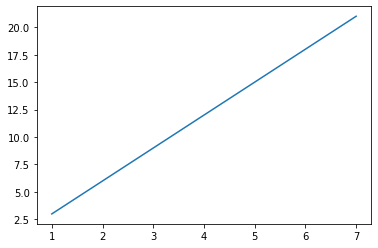

In [56]:
x = [1,2,3,4,5,6,7]
y = [3,6,9,12,15,18,21]
plt.plot(x,y)

In [57]:
import pandas
y0 = pandas.Series([3,6,9,12,15,18,21])
y1 = y0- y0.shift(1) 

In [58]:
y1

0    NaN
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
6    3.0
dtype: float64

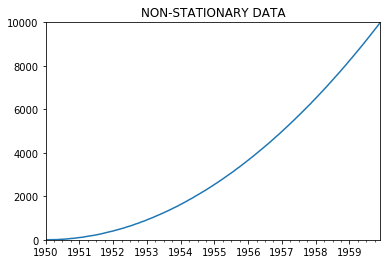

In [59]:
df2['c'].plot(ylim=[0,10000],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [60]:
df2['c1b'] = df2['c'] - df2['c'].shift(1)

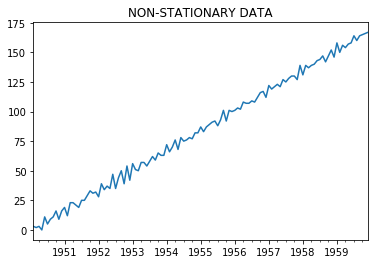

In [62]:
df2['c1b'].plot(title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [63]:
df2['c2b']  = df2['c1b'] - df2['c1b'].shift(1)

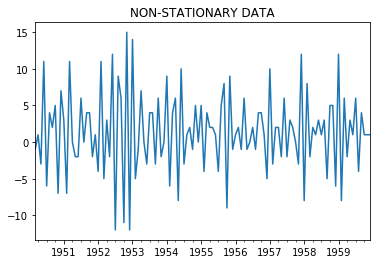

In [64]:
df2['c2b'].plot(title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

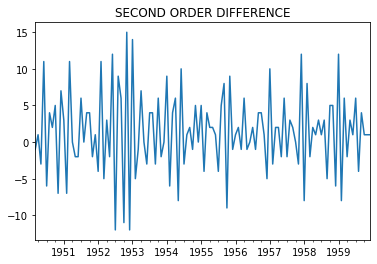

In [65]:
df2['d2c'] = df2['c'].diff().diff()
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True)

In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'


In [69]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


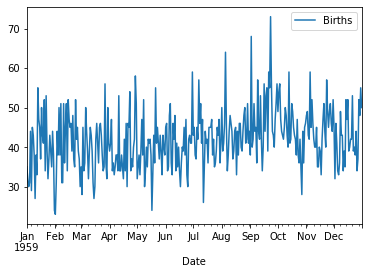

In [68]:
df2.plot()

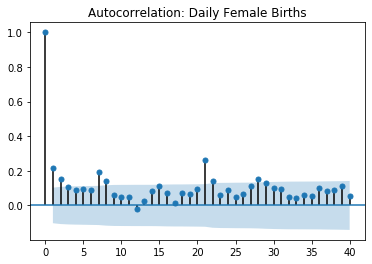

In [71]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);


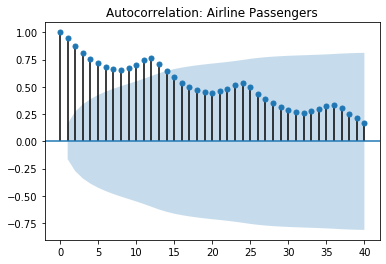

In [72]:
acf(df1['Thousands of Passengers'])
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);


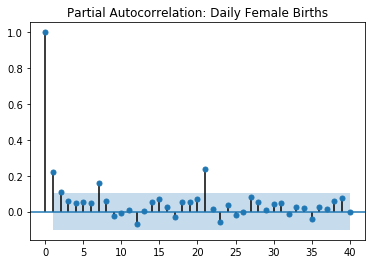

In [74]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);


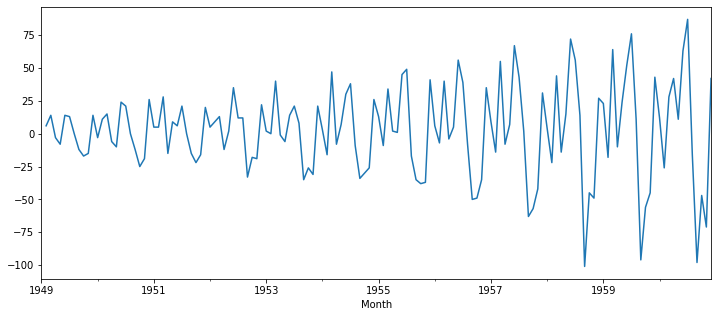

In [75]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5))


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


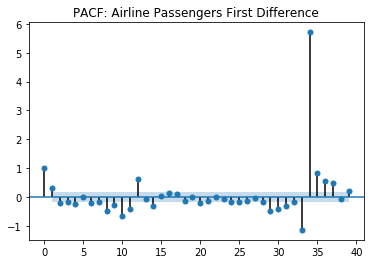

In [76]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));



In [77]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

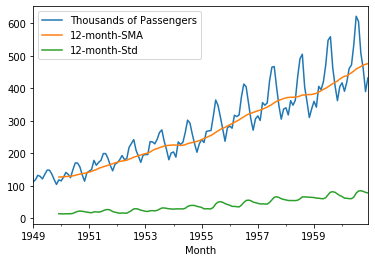

In [78]:
df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();

In [79]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

print(dfout)


Augmented Dickey-Fuller Test on Airline Data
ADF test statistic      0.815369
p-value                 0.991880
# lags used            13.000000
# observations        130.000000
dtype: float64


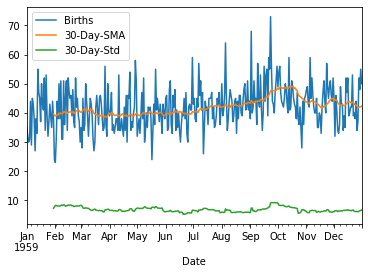

In [80]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();


In [82]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df2['Births'], autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

print(dfout)


Augmented Dickey-Fuller Test on Airline Data
ADF test statistic     -4.808291
p-value                 0.000052
# lags used             6.000000
# observations        358.000000
dtype: float64


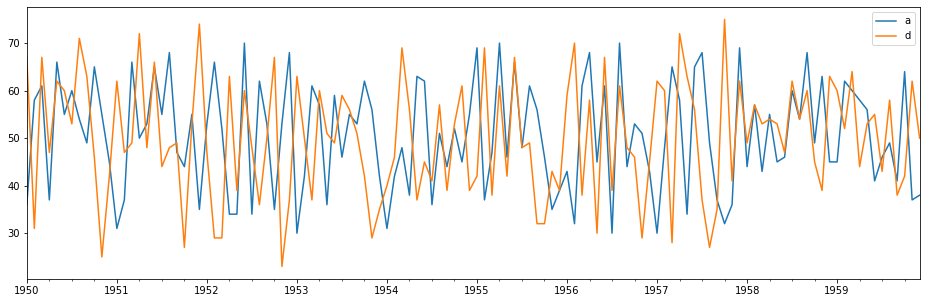

In [83]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/samples.csv',index_col=0,parse_dates=True) 

df3.index.freq = 'MS'
df3[['a','d']].plot(figsize=(16,5));


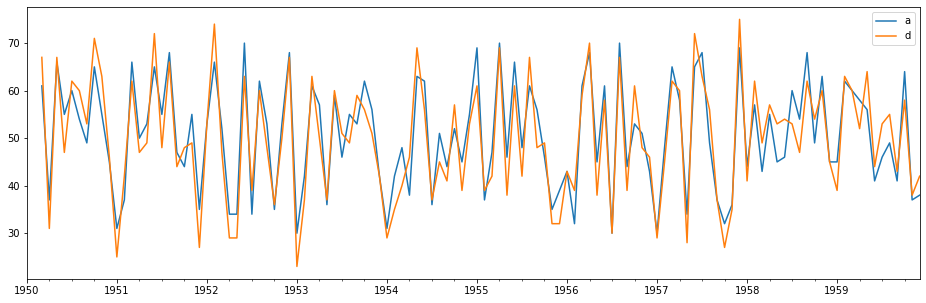

In [84]:
df3['a'].iloc[2:].plot(figsize=(16,5),legend=True);
df3['d'].shift(2).plot(legend=True);


In [85]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','d']],maxlag=3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.70512510516811, 0.1942027811635688, 116.0, 1),
   'ssr_chi2test': (1.7492231682328025, 0.18597442074424253, 1),
   'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681275, 0.1942027811635669, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (286.033942625561, 6.025362015680817e-45, 113.0, 2),
   'ssr_chi2test': (597.3806235365698, 1.907417667905223e-130, 2),
   'lrtest': (212.65135382912013, 6.658022084670888e-47, 2),
   'params_ftest': (286.03394262556435, 6.025362015677438e-45, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (188.7446232861624, 3.2288482941467694e-43, 110.0, 3),
   'ssr_chi2test': (602.2669343040274, 3.2505045874681137e-130, 3),
   'lrtest': (212.4788575746154, 8.480665715595584e-46, 3),
   'params_ftest': (188.74462328615994, 3.2288482941487054e-43, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [86]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AR,ARResults
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df.head()


,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


[Text(0, 0.5, 'Pop. Est. (thousands)'), Text(0.5, 0, '')]

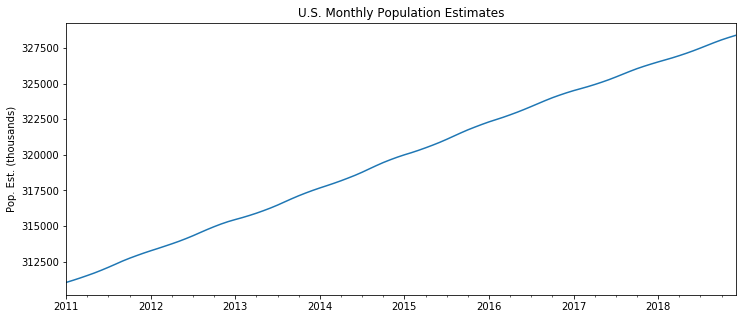

In [87]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel=''

ax = df['PopEst'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [88]:
len(df)

96

In [89]:
train = df.iloc[:84]
test = df.iloc[84:]


In [90]:
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')

print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        149.434881
L1.PopEst      0.999530
dtype: float64


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [93]:
train['PopEst_t-1'] = train['PopEst'].shift(1)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
train.dropna(inplace=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
X = train.iloc[:,1:2]
y = train.iloc[:,0].values
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
clf.intercept_

284.9137967893621

In [102]:
clf.coef_

array([0.99968592])

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


predicted=326218.2212, expected=326527
predicted=326374.148 , expected=326669
predicted=326370.2977, expected=326812
predicted=326366.4493, expected=326968
predicted=326362.6027, expected=327134
predicted=326358.7579, expected=327312
predicted=326354.9149, expected=327502
predicted=326351.0737, expected=327698
predicted=326347.2343, expected=327893
predicted=326343.3967, expected=328077
predicted=326339.5609, expected=328241
predicted=326335.7269, expected=328393


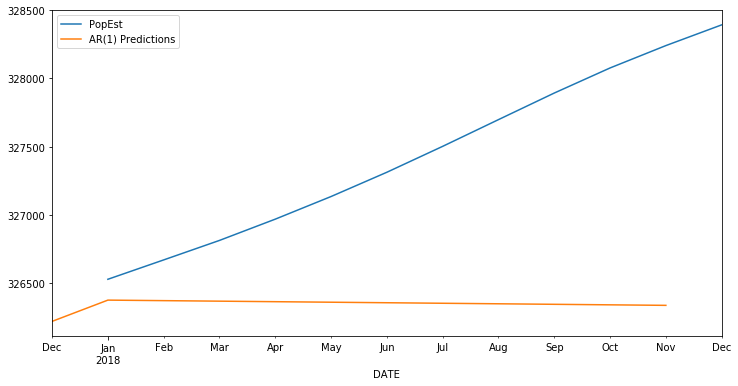

In [104]:

start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));


In [106]:
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')


Lag: 2
Coefficients:
const        128.075327
L1.PopEst      1.996565
L2.PopEst     -0.996967
dtype: float64


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


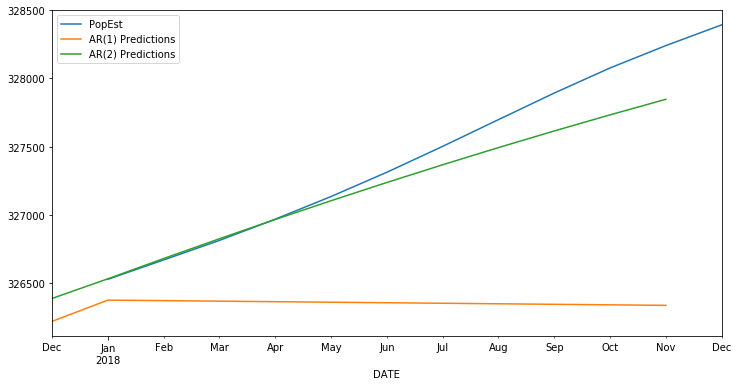

In [107]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [108]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')


Lag: 11
Coefficients:
const         96.056375
L1.PopEst      2.329419
L2.PopEst     -2.205518
L3.PopEst      1.617599
L4.PopEst     -1.220375
L5.PopEst      0.816533
L6.PopEst     -0.976180
L7.PopEst      0.970075
L8.PopEst     -0.248321
L9.PopEst      0.012590
L10.PopEst    -0.024572
L11.PopEst    -0.071554
dtype: float64


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


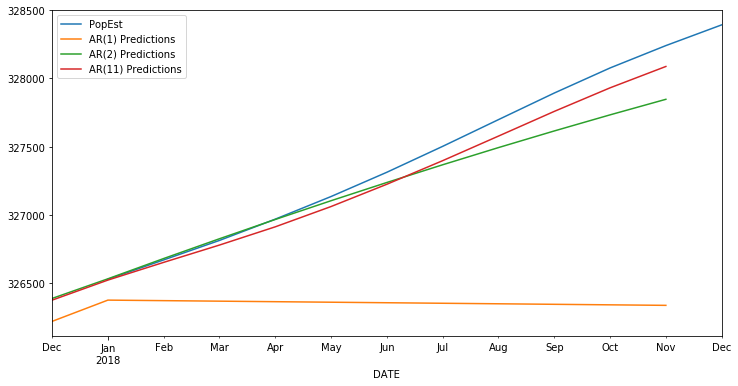

In [109]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [111]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1551300.059
AR(2) Error: 104909.2618
AR(11) Error: 64847.98107


In [112]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 3.4229
AR(2) AIC: 3.4468
AR(11) AIC:  3.661


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


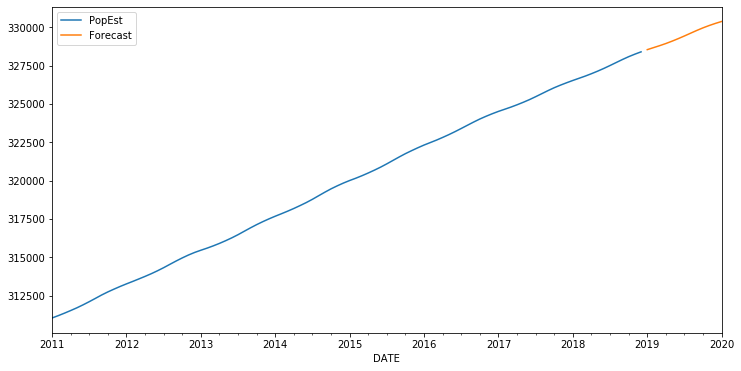

In [113]:
model = AR(df['PopEst'])
ARfit = model.fit(maxlag=11,method='mle')
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));


In [114]:
! pip install pmdarima


In [115]:
from pmdarima import auto_arima
auto_arima(df2['Births'],error_action='ignore').summary()


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Tue, 28 Apr 2020   AIC                           2460.154
Time:                        16:36:03   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()


Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.033 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.066 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.117 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.325 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.875, BIC=2485.258, Fit time=0.675 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.181 seconds
Total fit time: 1.404 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Tue, 28 Apr 2020   AIC                           2460.154
Time:                        16:37:36   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [118]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], 
                          start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.463 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.350 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.410 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.123 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.142, BIC=1035.518, Fit time=1.150 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.961, BIC=1034.212, Fit time=3.802 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.372, BIC=1047.748, Fit time=3.391 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.096, BIC=1038.222, Fit time=4.968 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -502.480
Date:                            Tue, 28 Apr 2020   AIC                           1016.961
Time:                                    16:38:41   BIC                           1034.212
Sample:                                         0   HQIC                          1023.971
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.179      0.027      0.978      -0.347       0.356
ar.L1         -0.3769      0.077     -4.896      0.000      -0.528      -0.226
ar.S.L12       0.6889      0.141      4.896      0.000       0.413       0.965
ar.S.L24       0.3092      0.107      2.884      0.004       0.099       0.519
ma.S.L12      -0.9730      0.498     -1.953      0.051      -1.950       0.004
sigma2       113.3532     47.403      2.391      0.017      20.445     206.262
===================================================================================
Ljung-Box (Q):                       58.64   Jarque-Bera (JB):                12.08
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
df1['Thousands of Passengers'].tail()

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Freq: MS, Name: Thousands of Passengers, dtype: int64

In [124]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120] 


In [127]:
df1.tail()

,Births
Date,
1959-04-26,35
1959-04-27,40
1959-04-28,42
1959-04-29,58
1959-04-30,51


In [128]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")


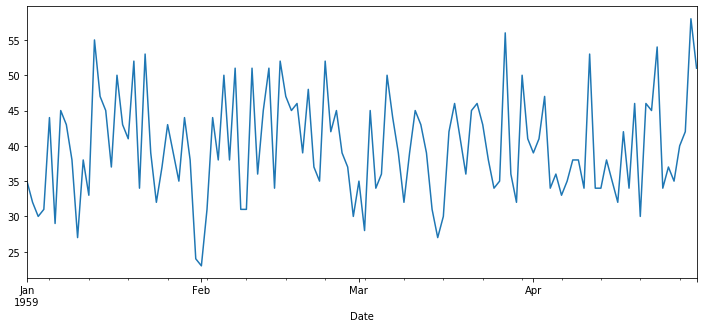

In [129]:
df1['Births'].plot(figsize=(12,5));

In [130]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [131]:
auto_arima(df1['Births'],seasonal=False).summary()


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 3); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:674: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-ki

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Tue, 28 Apr 2020   AIC                            822.741
Time:                        16:44:03   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8162      0.108    368.858      0.000      39.605      40.028
ar.L1.y        1.8569      0.081     22.938      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.034      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.128      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.021      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0651           -0.0237
AR.2            1.0533           +0.1582j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1582           +0.0000j            1.1582            0.0000
-----------------------------------------------------------------------------
"""

In [132]:
train = df1.iloc[:90]
test = df1.iloc[90:]

from statsmodels.tsa.arima_model import ARMA
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Tue, 28 Apr 2020   AIC                            627.809
Time:                        16:44:21   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


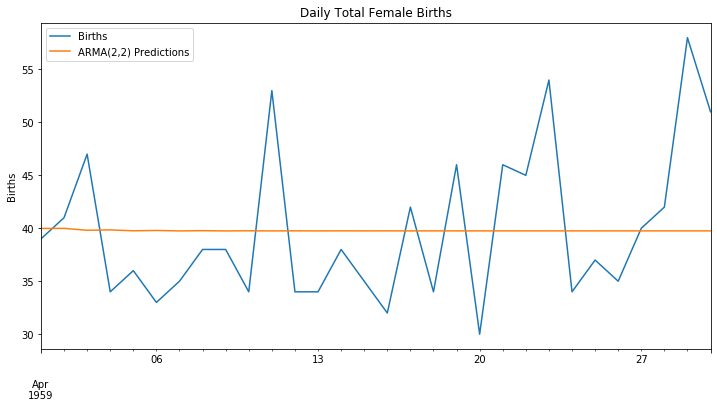

In [133]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' 

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


In [134]:
import pandas as pd
import numpy as np
airline = pd.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


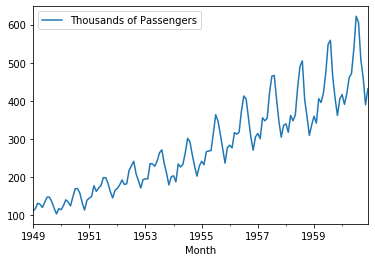

In [135]:
airline.plot();

In [138]:
adf_test(airline['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [145]:
auto_arima(airline['Thousands of Passengers'],seasonal=True).summary()


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/david

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Tue, 28 Apr 2020   AIC                           1344.044
Time:                        16:51:47   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6619      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.890      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.755      0.000      -0.958      -0.861
ma.L1         -1.9079      0.355     -5.374      0.000      -2.604      -1.212
ma.L2          0.9977      0.371      2.690      0.007       0.271       1.725
sigma2       611.7507    246.848      2.478      0.013     127.937    1095.565
===================================================================================
Ljung-Box (Q):                      358.18   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
model = auto_arima(airline['Thousands of Passengers'],seasonal=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/Users/david

In [165]:
train=airline.iloc[:108]
test=airline.iloc[108:]

In [167]:
#test

In [168]:
#start=len(train)
#end=len(train)+len(test)-1
print(len(test))
test['predictions']= model.predict(len(test))
test['predictions']

36


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Month
1958-01-01    434.231570
1958-02-01    453.116485
1958-03-01    482.869164
1958-04-01    515.383759
1958-05-01    542.564908
1958-06-01    558.444937
1958-07-01    560.552856
1958-08-01    550.244637
1958-09-01    532.002289
1958-10-01    511.978404
1958-11-01    496.235238
1958-12-01    489.166692
1959-01-01    492.499542
1959-02-01    505.082865
1959-03-01    523.449449
1959-04-01    542.932486
1959-05-01    558.995145
1959-06-01    568.405871
1959-07-01    569.965868
1959-08-01    564.638907
1959-09-01    555.103559
1959-10-01    544.897256
1959-11-01    537.413038
1959-12-01    535.024825
1960-01-01    538.558457
1960-02-01    547.215633
1960-03-01    558.929679
1960-04-01    571.021014
1960-05-01    580.953698
1960-06-01    586.985964
1960-07-01    588.554127
1960-08-01    586.313514
1960-09-01    581.856746
1960-10-01    577.212257
1960-11-01    574.274132
1960-12-01    574.318674
Name: predictions, dtype: float64

In [169]:
test.head()

,Thousands of Passengers,predictions
Month,,
1958-01-01,340,434.231570
1958-02-01,318,453.116485
1958-03-01,362,482.869164
1958-04-01,348,515.383759
1958-05-01,363,542.564908


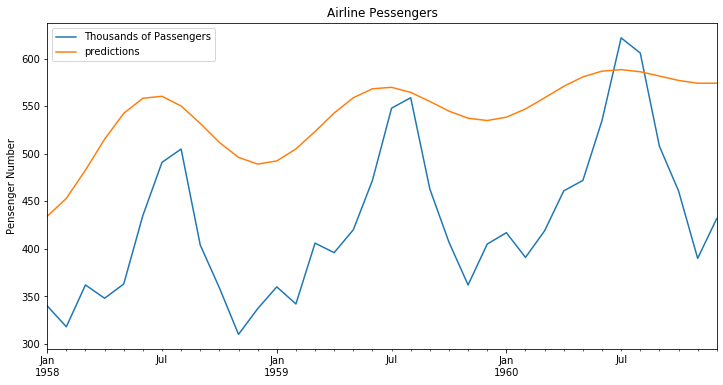

In [170]:
title = 'Airline Pessengers'
ylabel='Pensenger Number'
xlabel='' 

ax = test.plot(legend=True,figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);